In [6]:
import pickle
import numpy as np
import pandas as pd
from itertools import combinations

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cdist, pdist

from sklearn import metrics

In [2]:
# select dataset and encoding type
dataName = 'allHV.npz'
emgHVType =  'hvRel'

allHV = np.load(dataName)

# extract data and labels based on gesture, trial, and position
hv = allHV[emgHVType]
gestLabel = allHV['gestLabel']
posLabel = allHV['posLabel']
trialLabel = allHV['trialLabel']

# get list of unique values for each label
gestures = np.unique(gestLabel)
positions = np.unique(posLabel)
trials = np.unique(trialLabel)

numGestures = len(gestures)
numPositions = len(positions)
numTrials = len(trials)

# get data size info
D = hv.shape[1] # hypervector dimension
numHV = 80 # number of examples per trial

# color palettes for plotting
gPalette = sns.color_palette('Paired', numGestures)
pPalette = sns.color_palette('Paired', numPositions)

sns.set_context('talk')

In [3]:
def num_nonsingle(X):
    _,counts = np.unique(X,return_counts=True)
    return len(counts[counts > 1])

In [4]:
def remove_singleton_clusters(clusterLabels):
    X = np.copy(clusterLabels)
    clusts = np.unique(X)
    for c in clusts:
        if len(X[X == c]) < 1:
            X[X == c] = -1.0
    clusts = np.unique(X[X != -1])
    for i,c in enumerate(clusts):
        X[X == c] = i
    return X

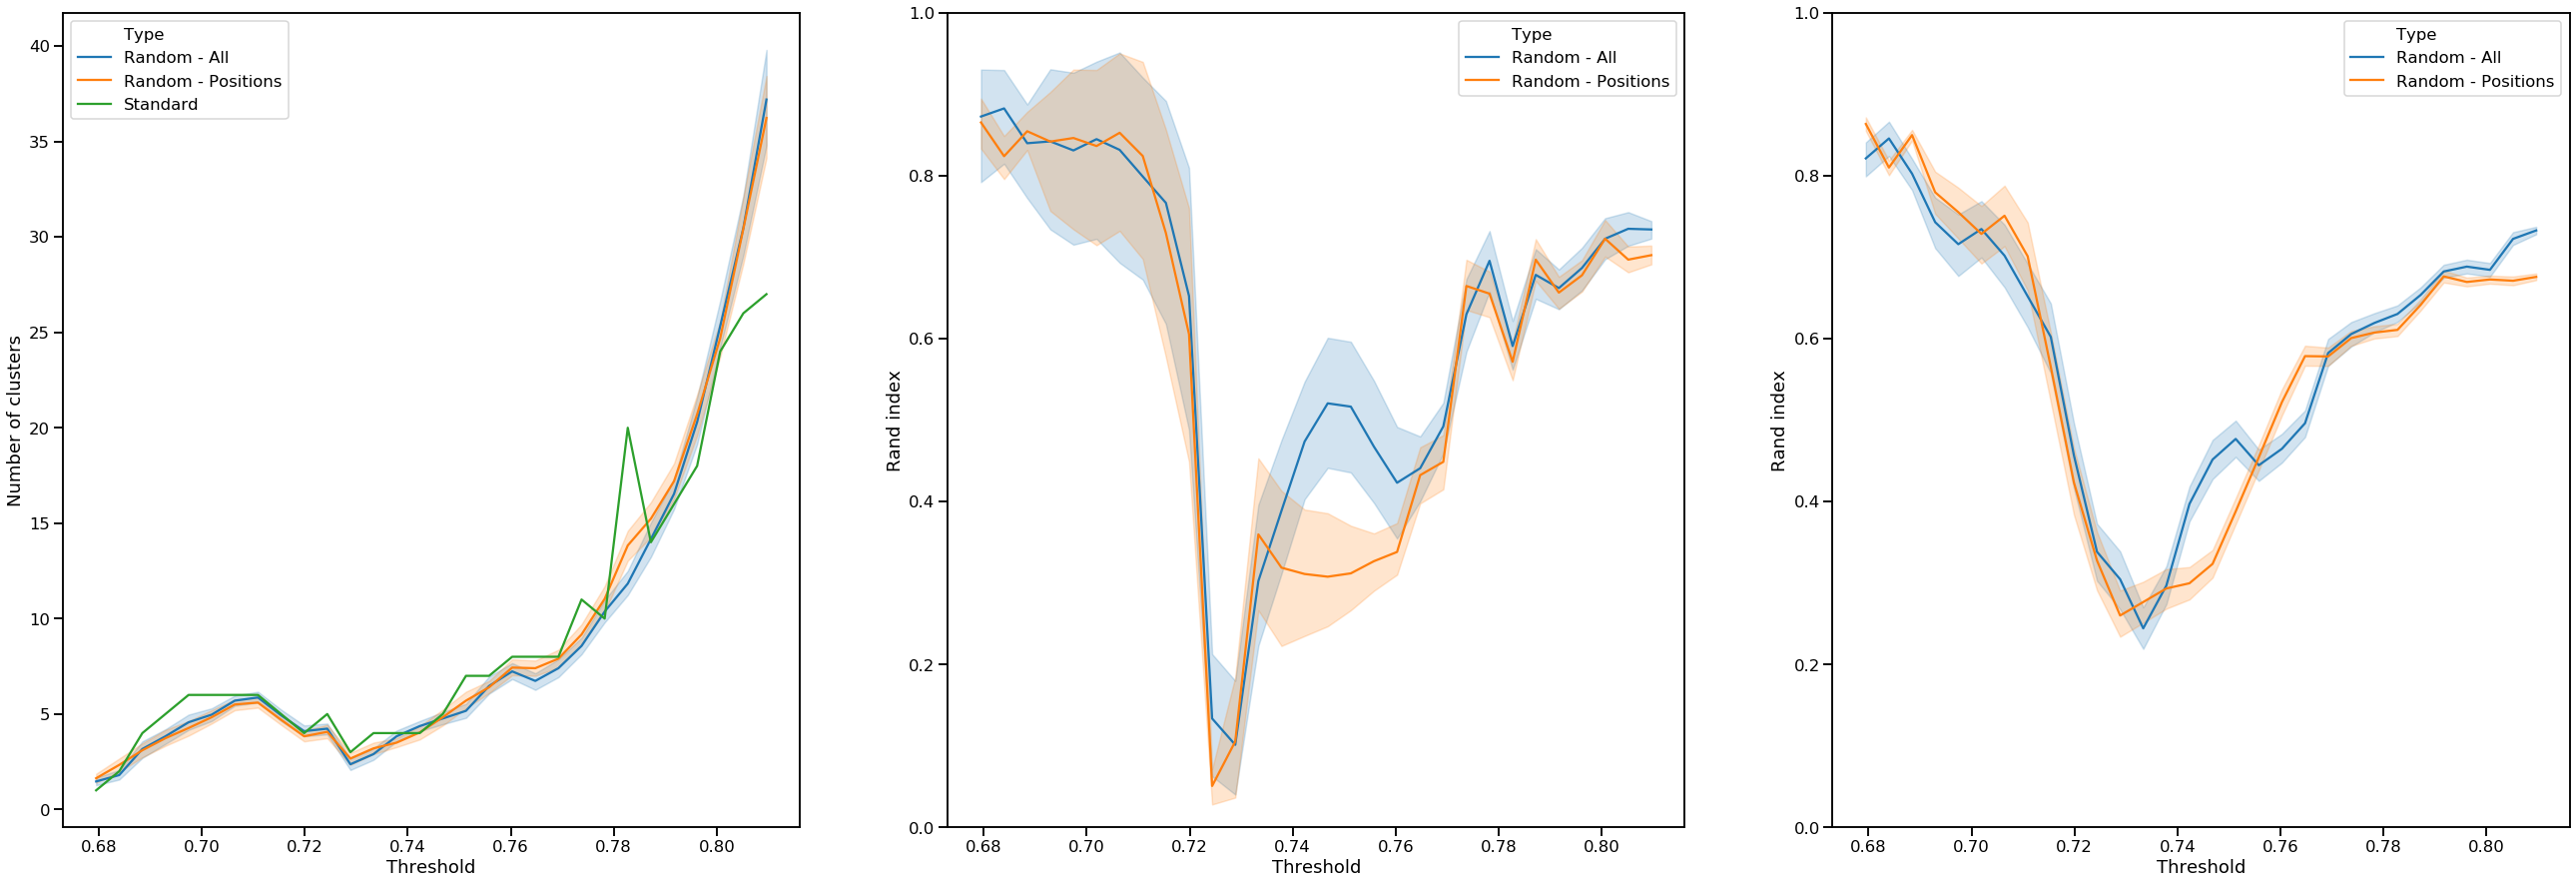

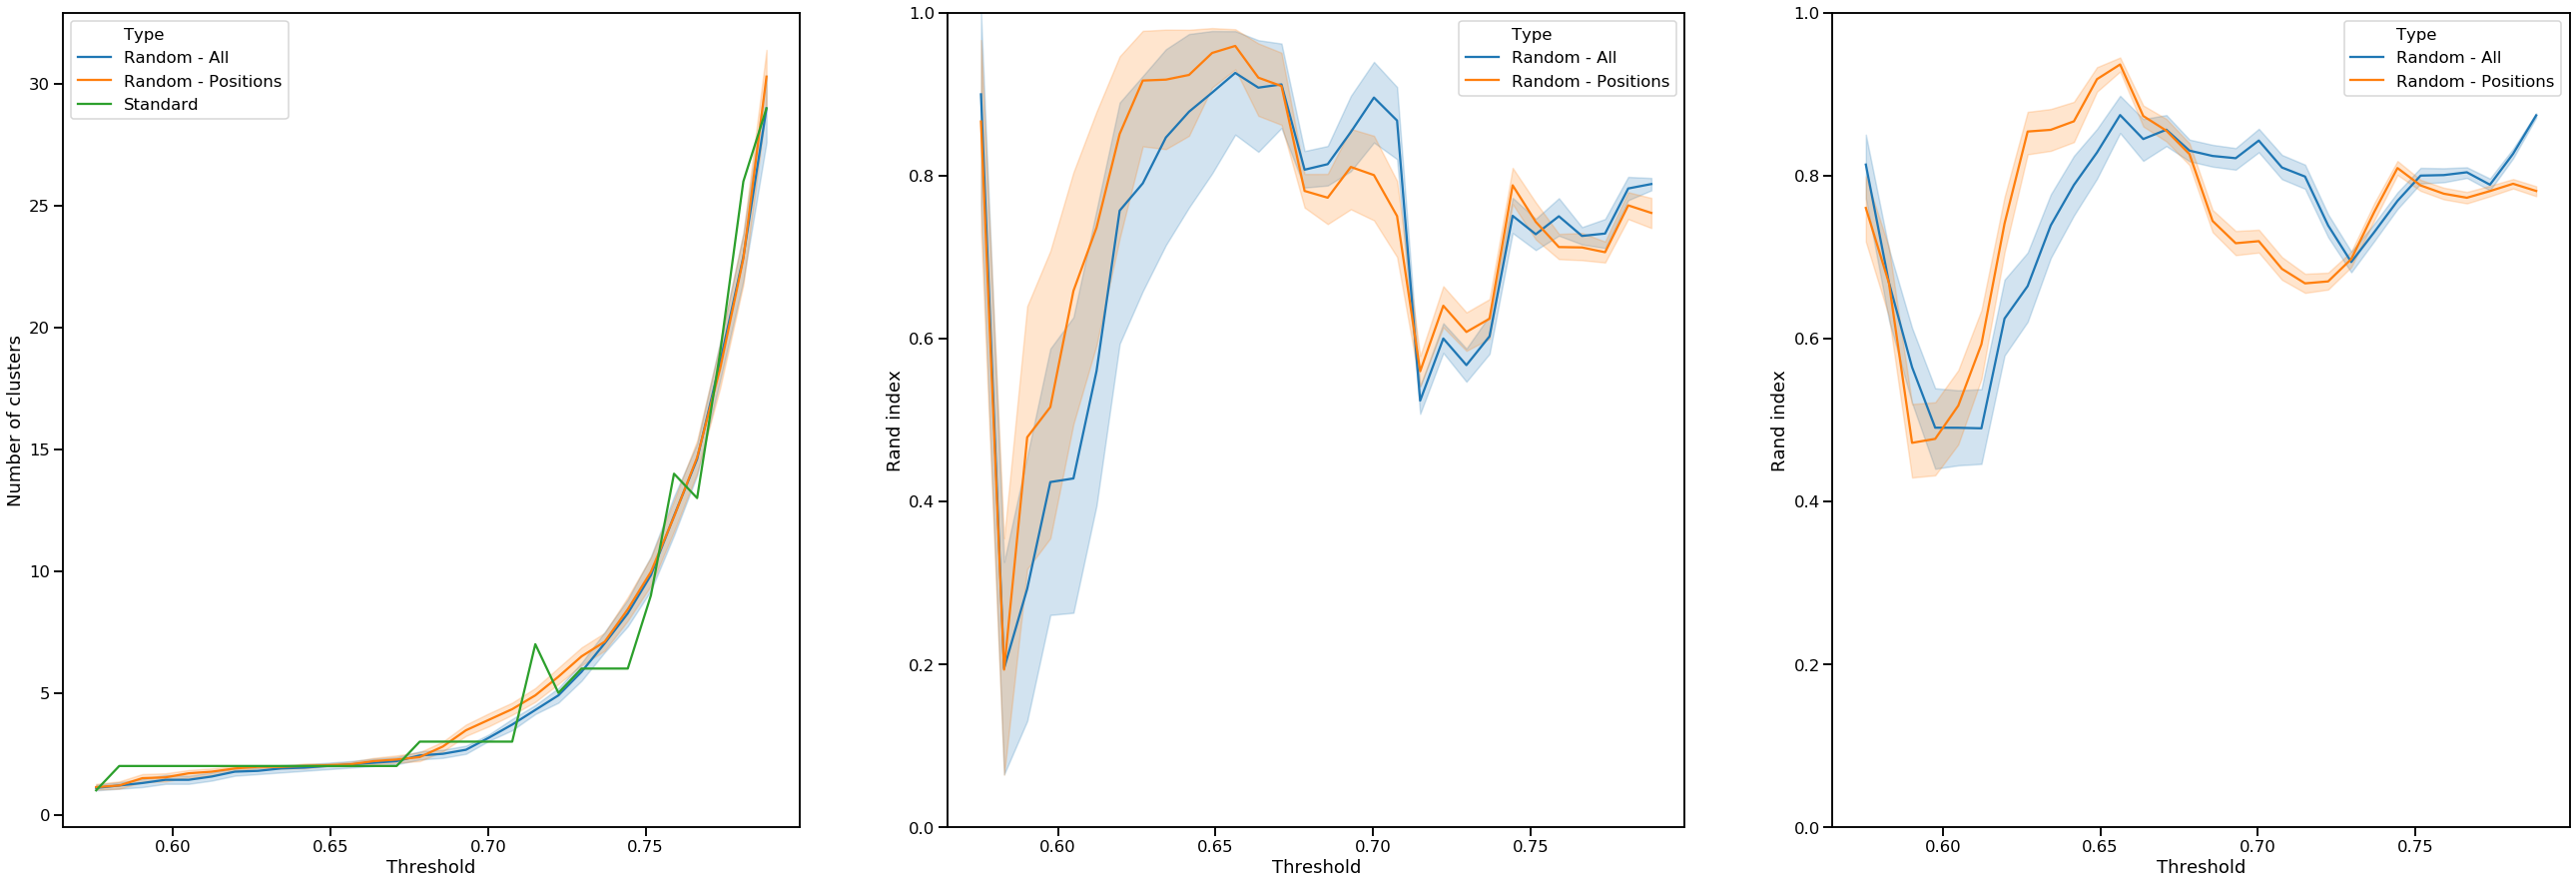

In [70]:
for g in [4,8]:
    with open('./clusters/hdc_run_%d.pickle' % g,'rb') as f:
        res = pickle.load(f)
        
        s = res['standardOrder']
        ra = res['randAll']
        rp = res['randPos']
        
        df = pd.DataFrame([num_nonsingle(x) for x in s],columns=['Number of clusters'])
        df['Iteration'] = np.zeros(len(s))
        df['Threshold index'] = np.arange(len(s))
        df['Threshold'] = res['tRange']
        df['Type'] = 'Standard'
        df['Method'] = 'No singleton'
        df['Rand index'] = 1
        df['Mutual information'] = 1
        df['Homogeneity'] = 1
        df['Completeness'] = 1
        df['V-measure'] = 1
        
        d = pd.DataFrame([len(np.unique(x)) for x in s],columns=['Number of clusters'])
        d['Iteration'] = np.zeros(len(s))
        d['Threshold index'] = np.arange(len(s))
        d['Threshold'] = res['tRange']
        d['Type'] = 'Standard'
        d['Method'] = 'Include singleton'
        d['Rand index'] = 1
        d['Mutual information'] = 1
        d['Homogeneity'] = 1
        d['Completeness'] = 1
        d['V-measure'] = 1
        
        df = df.append(d, ignore_index=True)
        
        for i,n in enumerate(ra):
            d = pd.DataFrame([num_nonsingle(x) for x in n],columns=['Number of clusters'])
            d['Iteration'] = i*np.ones(len(n),dtype='int')
            d['Threshold index'] = np.arange(len(n))
            d['Threshold'] = res['tRange']
            d['Type'] = 'Random - All'
            d['Method'] = 'No singleton'
            d['Rand index'] = [metrics.adjusted_rand_score(remove_singleton_clusters(x), remove_singleton_clusters(s[t])) for t,x in enumerate(n)]
            d['Mutual information'] = [metrics.adjusted_mutual_info_score(remove_singleton_clusters(x), remove_singleton_clusters(s[t])) for t,x in enumerate(n)]
            d['Homogeneity'] = [metrics.homogeneity_score(remove_singleton_clusters(s[t]), remove_singleton_clusters(x)) for t,x in enumerate(n)]
            d['Completeness'] = [metrics.completeness_score(remove_singleton_clusters(s[t]), remove_singleton_clusters(x)) for t,x in enumerate(n)]
            d['V-measure'] = [metrics.v_measure_score(remove_singleton_clusters(s[t]),remove_singleton_clusters(x)) for t,x in enumerate(n)]
            df = df.append(d, ignore_index=True)
            
            d = pd.DataFrame([len(np.unique(x)) for x in n],columns=['Number of clusters'])
            d['Iteration'] = i*np.ones(len(n),dtype='int')
            d['Threshold index'] = np.arange(len(n))
            d['Threshold'] = res['tRange']
            d['Type'] = 'Random - All'
            d['Method'] = 'Include singleton'
            d['Rand index'] = [metrics.adjusted_rand_score(x, s[t]) for t,x in enumerate(n)]
            d['Mutual information'] = [metrics.adjusted_mutual_info_score(x, s[t]) for t,x in enumerate(n)]
            d['Homogeneity'] = [metrics.homogeneity_score(s[t],x) for t,x in enumerate(n)]
            d['Completeness'] = [metrics.completeness_score(s[t],x) for t,x in enumerate(n)]
            d['V-measure'] = [metrics.v_measure_score(s[t],x) for t,x in enumerate(n)]
            df = df.append(d, ignore_index=True)
            
        for i,n in enumerate(rp):
            d = pd.DataFrame([num_nonsingle(x) for x in n],columns=['Number of clusters'])
            d['Iteration'] = i*np.ones(len(n),dtype='int')
            d['Threshold index'] = np.arange(len(n))
            d['Threshold'] = res['tRange']
            d['Type'] = 'Random - Positions'
            d['Method'] = 'No singleton'
            d['Rand index'] = [metrics.adjusted_rand_score(remove_singleton_clusters(x), remove_singleton_clusters(s[t])) for t,x in enumerate(n)]
            d['Mutual information'] = [metrics.adjusted_mutual_info_score(remove_singleton_clusters(x), remove_singleton_clusters(s[t])) for t,x in enumerate(n)]
            d['Homogeneity'] = [metrics.homogeneity_score(remove_singleton_clusters(s[t]), remove_singleton_clusters(x)) for t,x in enumerate(n)]
            d['Completeness'] = [metrics.completeness_score(remove_singleton_clusters(s[t]), remove_singleton_clusters(x)) for t,x in enumerate(n)]
            d['V-measure'] = [metrics.v_measure_score(remove_singleton_clusters(s[t]), remove_singleton_clusters(x)) for t,x in enumerate(n)]
            df = df.append(d, ignore_index=True)
            
            d = pd.DataFrame([len(np.unique(x)) for x in n],columns=['Number of clusters'])
            d['Iteration'] = i*np.ones(len(n),dtype='int')
            d['Threshold index'] = np.arange(len(n))
            d['Threshold'] = res['tRange']
            d['Type'] = 'Random - Positions'
            d['Method'] = 'Include singleton'
            d['Rand index'] = [metrics.adjusted_rand_score(x, s[t]) for t,x in enumerate(n)]
            d['Mutual information'] = [metrics.adjusted_mutual_info_score(x, s[t]) for t,x in enumerate(n)]
            d['Homogeneity'] = [metrics.homogeneity_score(s[t],x) for t,x in enumerate(n)]
            d['Completeness'] = [metrics.completeness_score(s[t],x) for t,x in enumerate(n)]
            d['V-measure'] = [metrics.v_measure_score(s[t],x) for t,x in enumerate(n)]
            df = df.append(d, ignore_index=True)
                    
#         f,ax = plt.subplots(2,3,figsize=(45,30))
#         sns.lineplot(x='Threshold',y='Number of clusters',hue='Type',style='Method',data=df,ax=ax[0,0])
#         sns.lineplot(x='Threshold',y='Rand index',hue='Type',style='Method',data=df,ax=ax[0,1])
#         sns.lineplot(x='Threshold',y='Mutual information',hue='Type',style='Method',data=df,ax=ax[0,2])
#         sns.lineplot(x='Threshold',y='Homogeneity',hue='Type',style='Method',data=df,ax=ax[1,0])
#         sns.lineplot(x='Threshold',y='Completeness',hue='Type',style='Method',data=df,ax=ax[1,1])
#         sns.lineplot(x='Threshold',y='V-measure',hue='Type',style='Method',data=df,ax=ax[1,2])
#         plt.show()
        
        df2 = pd.DataFrame()
        for t in range(len(ra[0])):
            d = pd.DataFrame(data={'Rand index':[metrics.adjusted_rand_score(ra[i][t], ra[j][t]) for i,j in combinations(range(len(ra)),2)],
                                  'Mutual information':[metrics.adjusted_mutual_info_score(ra[i][t], ra[j][t]) for i,j in combinations(range(len(ra)),2)],
                                  'Homogeneity':[metrics.homogeneity_score(ra[i][t], ra[j][t]) for i,j in combinations(range(len(ra)),2)],
                                  'Completeness':[metrics.completeness_score(ra[i][t], ra[j][t]) for i,j in combinations(range(len(ra)),2)],
                                  'V-measure':[metrics.v_measure_score(ra[i][t], ra[j][t]) for i,j in combinations(range(len(ra)),2)]})
            d['Threshold'] = res['tRange'][t]
            d['Type'] = 'Random - All'
            df2 = df2.append(d)
            
            d = pd.DataFrame(data={'Rand index':[metrics.adjusted_rand_score(rp[i][t], rp[j][t]) for i,j in combinations(range(len(ra)),2)],
                                  'Mutual information':[metrics.adjusted_mutual_info_score(rp[i][t], rp[j][t]) for i,j in combinations(range(len(ra)),2)],
                                  'Homogeneity':[metrics.homogeneity_score(rp[i][t], rp[j][t]) for i,j in combinations(range(len(ra)),2)],
                                  'Completeness':[metrics.completeness_score(rp[i][t], rp[j][t]) for i,j in combinations(range(len(ra)),2)],
                                  'V-measure':[metrics.v_measure_score(rp[i][t], rp[j][t]) for i,j in combinations(range(len(ra)),2)]})
            d['Threshold'] = res['tRange'][t]
            d['Type'] = 'Random - Positions'
            df2 = df2.append(d)
    
        f,ax = plt.subplots(1,3,figsize=(45,15))
        sns.lineplot(x='Threshold',y='Number of clusters',hue='Type',hue_order=['Random - All', 'Random - Positions', 'Standard'],data=df.loc[df['Method'] == 'No singleton'],ax=ax[0])
        sns.lineplot(x='Threshold',y='Rand index',hue='Type',data=df.loc[(df['Method'] == 'No singleton') & (df['Type'] != 'Standard')],ax=ax[1])
        ax[1].set(ylim=(0,1))
        sns.lineplot(x='Threshold',y='Rand index',hue='Type',data=df2,ax=ax[2])
        ax[2].set(ylim=(0,1))
        plt.show()


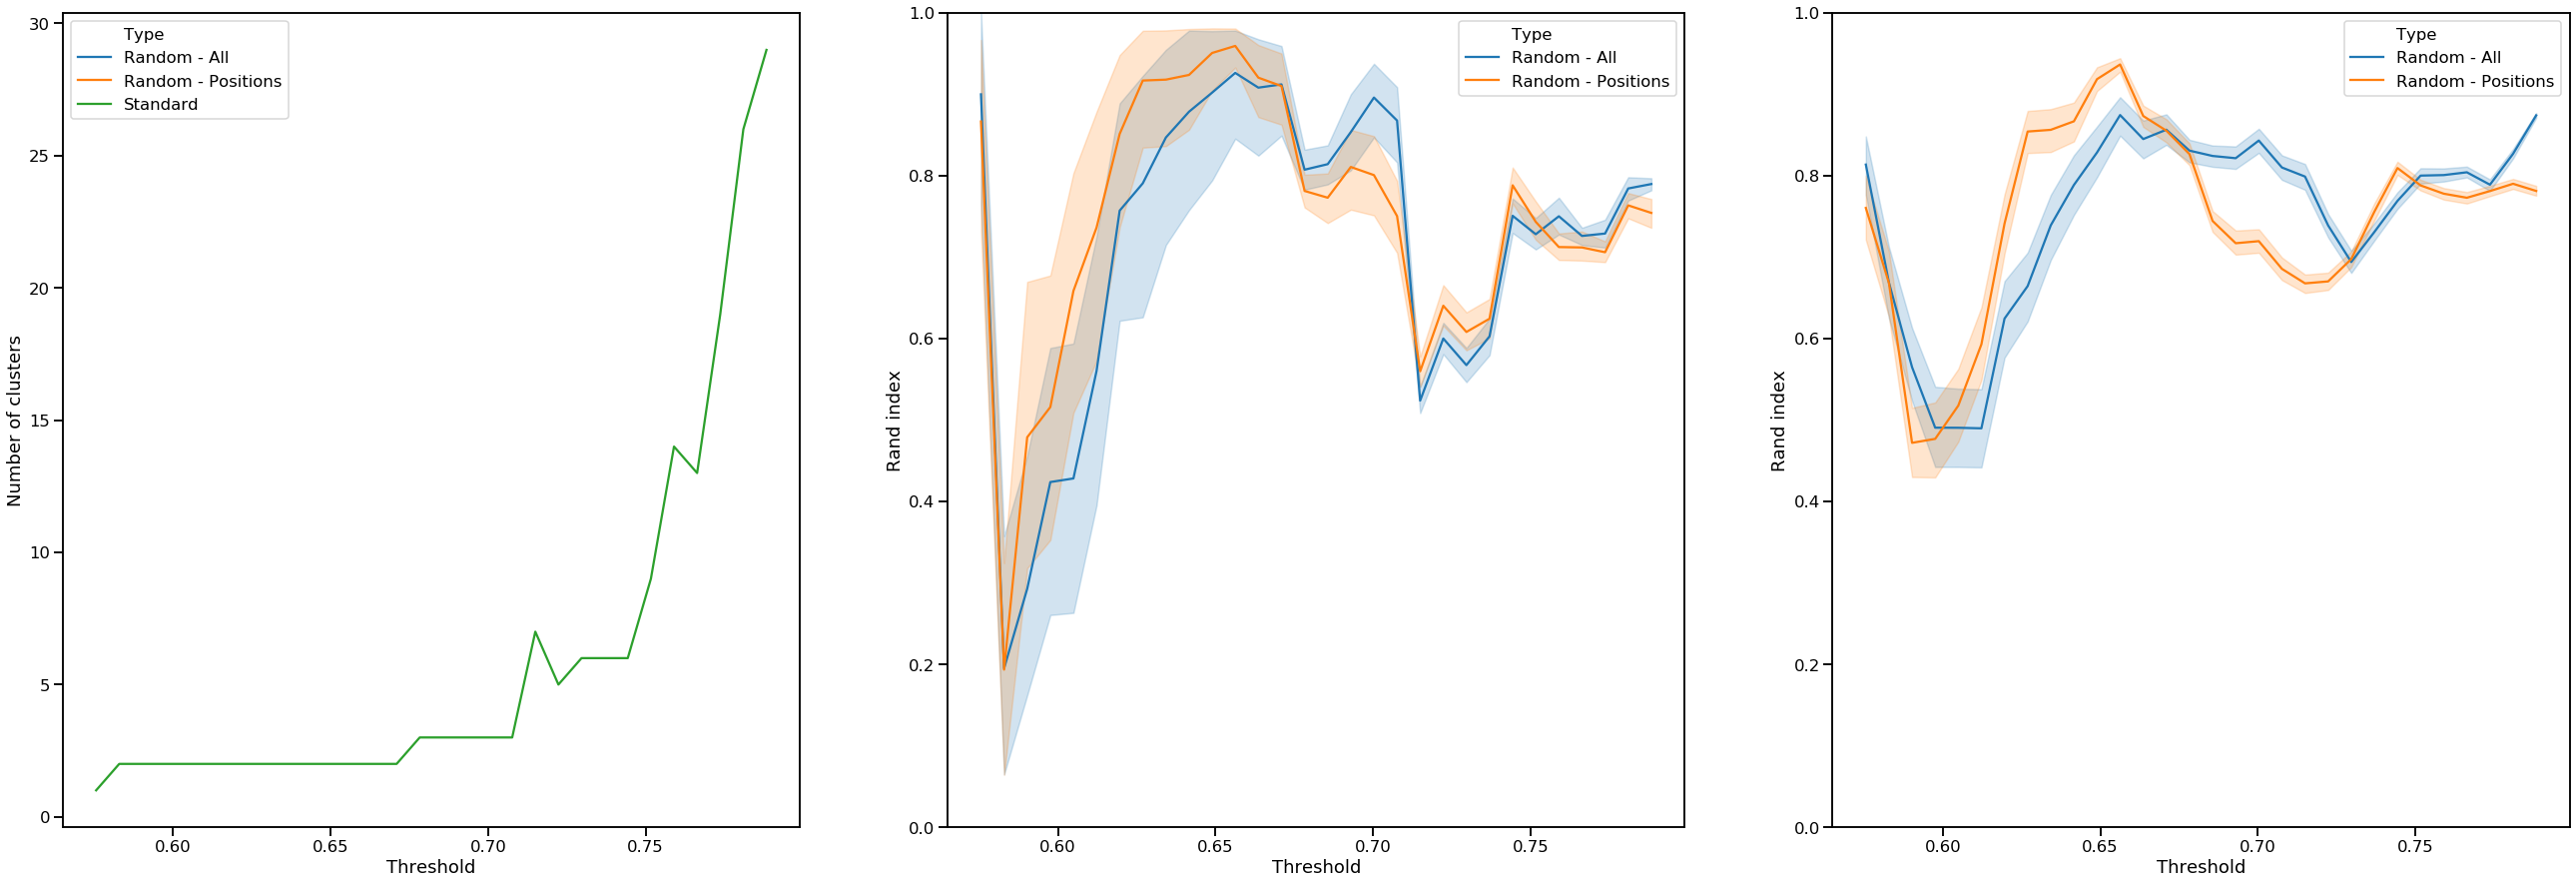

In [153]:
f,ax = plt.subplots(1,3,figsize=(45,15))
sns.lineplot(x='Threshold',y='Number of clusters',hue='Type',hue_order=['Random - All', 'Random - Positions', 'Standard'],data=df.loc[(df['Method'] == 'No singleton') & (df['Type'] == 'Standard')],ax=ax[0])
sns.lineplot(x='Threshold',y='Rand index',hue='Type',data=df.loc[(df['Method'] == 'No singleton') & (df['Type'] != 'Standard')],ax=ax[1])
ax[1].set(ylim=(0,1))
sns.lineplot(x='Threshold',y='Rand index',hue='Type',data=df2,ax=ax[2])
ax[2].set(ylim=(0,1))
plt.show()

In [92]:
for g in [8]:
    with open('./clusters/hdc_run_%d.pickle' % g,'rb') as f:
        res = pickle.load(f)
        
        s = res['standardOrder']
        ra = res['randAll']
        rp = res['randPos']

In [132]:
membership = []
posFilt = posLabel[gestLabel == 8]
for l in s[1:13]:
    membership.append([np.unique(posFilt[l == c],return_counts=True) for c in np.unique(l)])

In [143]:
membershipRandAll = []
n = ra[0]
for l in n[1:13]:
        membershipRandAll.append([np.unique(posFilt[l == c],return_counts=True) for c in np.unique(l)])

In [149]:
membershipRandPos = []
n = rp[1]
for l in n[1:13]:
    membershipRandPos.append([np.unique(posFilt[l == c],return_counts=True) for c in np.unique(l)])

In [146]:
membership

[[(array([0, 1, 2, 3, 4, 5, 6], dtype=int8),
   array([240, 240,   7, 240, 240, 240,  11])),
  (array([2, 6, 7], dtype=int8), array([233, 229, 240]))],
 [(array([0, 1, 2, 3, 4, 5, 6], dtype=int8),
   array([240, 240,   6, 240, 240, 240,  11])),
  (array([2, 6, 7], dtype=int8), array([234, 229, 240]))],
 [(array([0, 1, 2, 3, 4, 5, 6], dtype=int8),
   array([240, 240,   5, 240, 240, 240,  11])),
  (array([2, 6, 7], dtype=int8), array([235, 229, 240]))],
 [(array([0, 1, 3, 4, 5, 6], dtype=int8),
   array([240, 240, 240, 240, 240,  11])),
  (array([2, 6, 7], dtype=int8), array([240, 229, 240]))],
 [(array([0, 1, 3, 4, 5, 6], dtype=int8),
   array([240, 240, 240, 240, 240,  11])),
  (array([2, 6, 7], dtype=int8), array([240, 229, 240]))],
 [(array([0, 1, 3, 4, 5, 6], dtype=int8),
   array([240, 240, 240, 240, 240,  11])),
  (array([2, 6, 7], dtype=int8), array([240, 229, 240]))],
 [(array([0, 1, 3, 4, 5, 6], dtype=int8),
   array([240, 240, 240, 240, 240,  11])),
  (array([2, 6, 7], dtype=i

In [147]:
membershipRandAll

[[(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int8),
   array([240, 240, 240, 240, 240, 240, 240, 240]))],
 [(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int8),
   array([240, 240, 240, 240, 240, 240, 240, 240]))],
 [(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int8),
   array([240, 240, 240, 240, 240, 240, 240, 240]))],
 [(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int8),
   array([240, 240, 240, 240, 240, 240, 240, 240]))],
 [(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int8),
   array([240, 240, 240, 240, 240, 240, 240, 240]))],
 [(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int8),
   array([240, 240, 240, 240, 240, 240, 240, 240]))],
 [(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int8),
   array([240, 240, 240, 240, 240, 240, 240, 240]))],
 [(array([0, 1, 3, 4, 5, 6], dtype=int8),
   array([240, 240, 240, 240, 240,   9])),
  (array([2, 6, 7], dtype=int8), array([240, 231, 240]))],
 [(array([0, 1, 3, 4, 5, 6], dtype=int8),
   array([240, 240, 240, 240, 240,   9])),
  (array([2, 6, 7], dtype=int8), array([240, 231, 240]))]

In [150]:
membershipRandPos

[[(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int8),
   array([240, 240, 240, 240, 240, 240, 240, 240]))],
 [(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int8),
   array([240, 240, 240, 240, 240, 240, 240, 240]))],
 [(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int8),
   array([240, 240, 240, 240, 240, 240, 240, 240]))],
 [(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int8),
   array([240, 240, 240, 240, 240, 240, 240, 240]))],
 [(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int8),
   array([240, 240, 240, 240, 240, 240, 240, 240]))],
 [(array([0, 2, 3, 6, 7], dtype=int8), array([  1, 240, 240, 240, 240])),
  (array([0, 1, 4, 5], dtype=int8), array([239, 240, 240, 240]))],
 [(array([2, 3, 6, 7], dtype=int8), array([240, 240, 240, 240])),
  (array([0, 1, 4, 5], dtype=int8), array([240, 240, 240, 240]))],
 [(array([2, 3, 6, 7], dtype=int8), array([240, 240, 240, 240])),
  (array([0, 1, 4, 5], dtype=int8), array([240, 240, 240, 240]))],
 [(array([2, 3, 6, 7], dtype=int8), array([240, 240, 240, 240])),
  (array([0, 1, 4